In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files = [
    ('../results/ICML/adult/gpyt2500_dempar_tuning_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_dempar_tuning_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$PR_t={num}${with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)

In [3]:
fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

In [20]:
def acc_vs_di(plot, legend, *data):
    ms = 4
    xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
    yaxis = ('accuracy', 'accuracy')
    legends = []
    startindex = 0

    plot.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness" if legend is not None else None)
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if legend is not None:
        return legends

In [5]:
def pr0_vs_pr1(plot, legend, sens, *data):
    ms = 4
    xaxis = (f'0-PR-{sens}', '$PR_{s=0}$')
    yaxis = (f'1-PR-{sens}', '$PR_{s=1}$')
    legends = []
    startindex = 0

    plot.plot([0., 1.], [0., 1.], 'k--', label="perfect fairness" if legend is not None else None)
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if legend is not None:        return legends

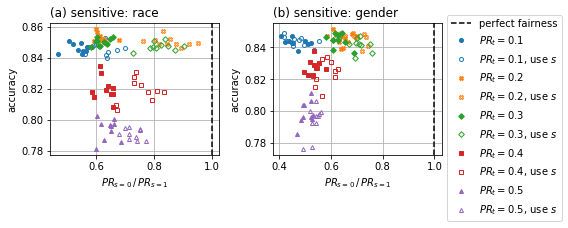

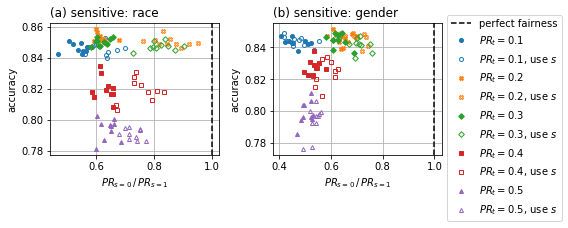

In [21]:
fig, plots = plt.subplots(ncols=2, figsize=(8, 2.2))
acc_vs_di(plots[0], None, fairgp[0])
plots[0].set_title("(a) sensitive: race", loc='left')
# plots[0].set_ylim(0.14, 0.44)
# plots[0].set_xlim(0.07, 0.38)
legends = acc_vs_di(plots[1], ("outside", 1.1), fairgp[1])
plots[1].set_title("(b) sensitive: gender", loc='left')

fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.32)
fig.savefig("/Users/tk324/dev/latex/Tunable_Fairness_ICML/ECML/figures/adult_parity_scatter_acc.pdf",
            dpi=200, bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
fig

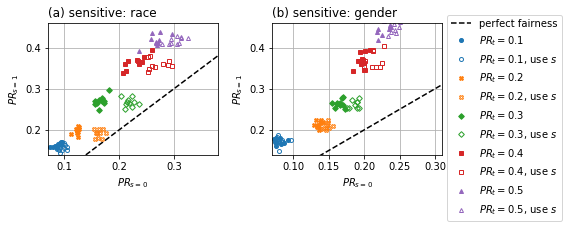

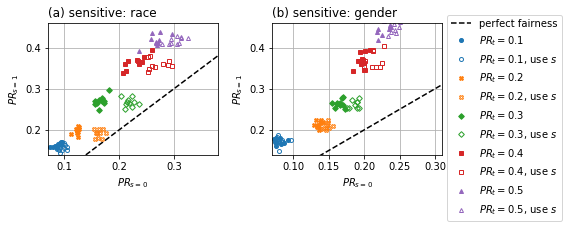

In [17]:
fig, plots = plt.subplots(ncols=2, figsize=(8, 2.2))

pr0_vs_pr1(plots[0], None, 'race', fairgp[0])
plots[0].set_title("(a) sensitive: race", loc='left')
plots[0].set_ylim(0.14, 0.46)
plots[0].set_xlim(0.07, 0.38)
legends = pr0_vs_pr1(plots[1], ("outside", 1.1), 'sex', fairgp[1])
plots[1].set_title("(b) sensitive: gender", loc='left')
plots[1].set_ylim(0.14, 0.46)
plots[1].set_xlim(0.07, 0.31)

fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.32)
fig.savefig("/Users/tk324/dev/latex/Tunable_Fairness_ICML/ECML/figures/adult_parity_scatter_pr_pr.pdf",
            dpi=200, bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
fig